<img src="https://storage.googleapis.com/ultralytics/logo/logoname1000.png" width="150">

<table align="center"><td>
  <a target="_blank"  href="https://github.com/ultralytics/yolov3/blob/master/tutorial.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on github
  </a>
</td><td>
  <a target="_blank"  href="https://colab.sandbox.google.com/github/ultralytics/yolov3/blob/master/tutorial.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
</td></table>

This notebook contains software developed by Ultralytics LLC, and **is freely available for redistribution under the GPL-3.0 license**. For more information please visit https://github.com/ultralytics/yolov3 and https://www.ultralytics.com.







In [2]:
%%capture
!pip install -U -r requirements.txt

In [3]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.6.0 CPU


In [8]:
!ls ../data

obj.data  obj.names  obj_train_data  train.txt


Clone repository and download COCO 2014 dataset (20GB):

Run `detect.py` to perform inference on images in `data/samples` folder:

Run `train.py` to train YOLOv3-SPP starting from a darknet53 backbone:

In [ ]:
!python3 train.py --data data/obj.data --cfg cfg/yolov3-spp.cfg --img-size 320 --epochs 25 --nosave --weights weights/yolov3-spp.pt

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(adam=False, batch_size=16, bucket='', cache_images=False, cfg='cfg/yolov3-spp.cfg', data='data/obj.data', device='', epochs=25, evolve=False, freeze_layers=False, img_size=[320], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp.pt')
Using CPU

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
Model Summary: 225 layers, 6.26003e+07 parameters, 6.26003e+07 gradients
Optimizer groups: 76 .bias, 76 Conv2d.weight, 73 other
PESOS:  weights/yolov3-spp.pt
data/train.txt - data/
Reading image shapes: 100%|█████████████████| 779/779 [00:00<00:00, 1304.31it/s]
Caching labels data/train.txt (772 found, 0 missing, 7 empty, 0 duplicate, for 7
data/train.txt - data/
Caching labels data/train.txt (772 found, 0 missing, 7 empty, 0 duplicate, for 7
Image sizes 320 - 320 train, 320 test
Using 2 dataloa

Run `test.py` to evaluate the performance of a trained darknet or PyTorch model:

In [15]:
!python3 test.py --data data/obj.data --cfg cfg/custom-yolo.cfg --img-size 320 --save-json --weights weights/last.pt

Namespace(augment=False, batch_size=16, cfg='cfg/custom-yolo.cfg', conf_thres=0.001, data='data/obj.data', device='', img_size=320, iou_thres=0.6, save_json=True, single_cls=False, task='test', weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Model Summary: 225 layers, 6.26003e+07 parameters, 6.26003e+07 gradients
Fusing layers...
Model Summary: 152 layers, 6.25734e+07 parameters, 6.25734e+07 gradients
Caching labels ../data/train.txt (772 found, 0 missing, 7 empty, 0 duplicate, fo
               Class    Images   Targets         P         R   mAP@0.5        F1/home/ec2-user/SageMaker/yolo_test/yolov3/utils/utils.py:512: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  i, j = (x[:, 5:] > conf_thres).nonzero().t()
               Class    Images   Targ

Reproduce tutorial training runs and plot training results:

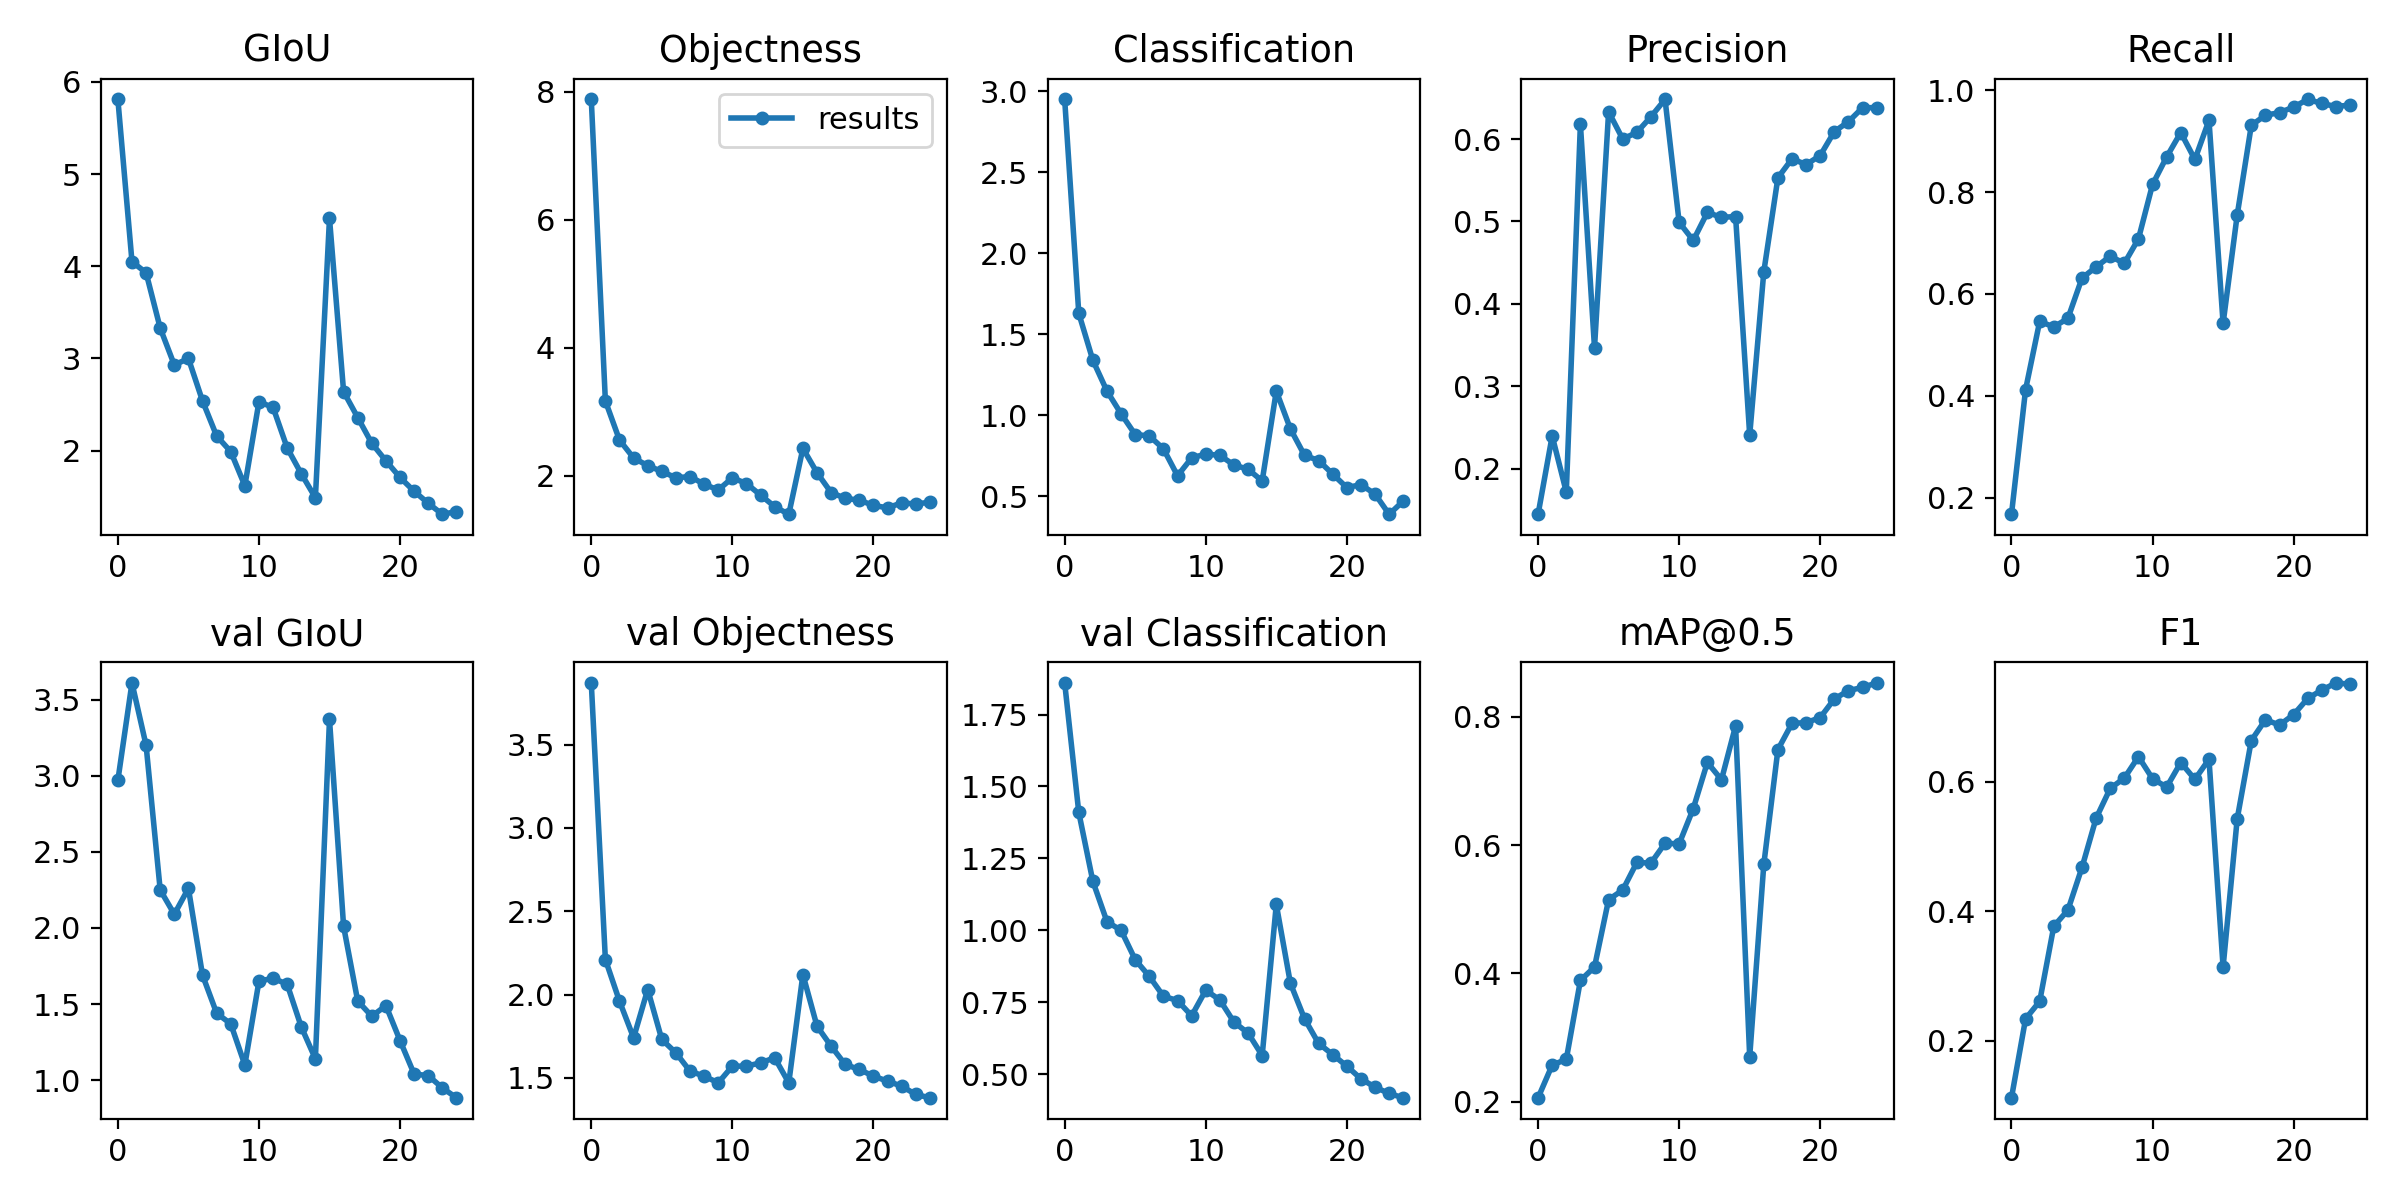

In [34]:
# !python3 train.py --data data/coco_16img.data --batch-size 16 --accumulate 1 --nosave && mv results.txt results_coco_16img.txt  # CUSTOM TRAINING EXAMPLE
# !python3 train.py --data data/coco_64img.data --batch-size 16 --accumulate 1 --nosave && mv results.txt results_coco_64img.txt 
!python3 -c "from utils import utils; utils.plot_results()"  # plot training results
Image(filename='results.png', width=800)

Extras below

---




In [35]:
!curl "https://jumbocolombiafood.vteximg.com.br/arquivos/ids/3496861-750-750/7702001041701.jpg?v=637230819964000000" --output samples/test.jpg
!curl "https://i2.wp.com/mercaenlinea.nyc3.digitaloceanspaces.com/2019/03/papas_margarita_limon_110gr.jpg?fit=700%2C700&ssl=1" --output samples/test1.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 54180  100 54180    0     0      0      0 --:--:-- --:--:-- --:--:--     0 0     0   551k      0 --:--:-- --:--:-- --:--:--  551k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 68598  100 68598    0     0  1456k      0 --:--:-- --:--:-- --:--:-- 1425k


Namespace(agnostic_nms=False, augment=False, cfg='cfg/custom-yolo.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=320, iou_thres=0.6, names='../data/obj.names', output='output', save_txt=True, source='samples', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Model Summary: 225 layers, 6.26003e+07 parameters, 6.26003e+07 gradients
['papas_margaritas_limon_packEconomico_x300g', 'yogur_finesse_frutos_rojos', 'spagheti_barilla', 'papas_margaritas_limon_x110g', 'arroz_blanco_carulla', 'maracuya_fruta']
image 1/2 samples/test.jpg: [tensor([[ 59.92261,  45.80519, 276.92886, 298.11090,   0.82727,   1.00000]], device='cuda:0')]
320x320 1 yogur_finesse_frutos_rojoss, Done. (0.061s)
image 2/2 samples/test1.jpg: [None]
320x320 Done. (0.058s)
Results saved to /home/ec2-user/SageMaker/yolo_test/yolov3/output
Done. (0.231s)


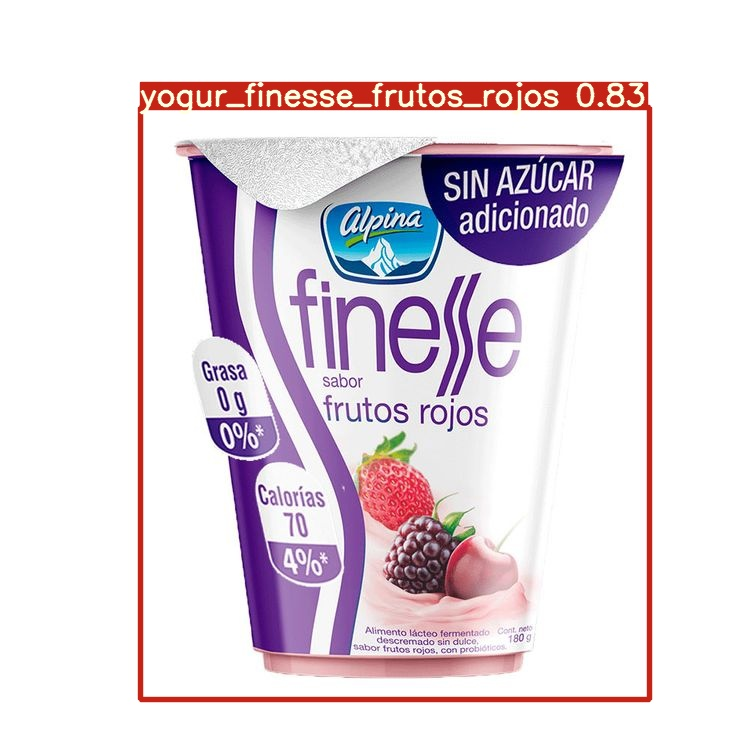

In [36]:
# Unit Tests
!python detect.py --names ../data/obj.names --cfg cfg/custom-yolo.cfg --img-size 320 --weights weights/last.pt --source samples --save-txt
Image(data="output/test.jpg", width=300)